# Capstone Project - IBM Advanced Data Science

### Dataset: Speed Dating (Columbia Business School)
Source: https://www.openml.org/search?type=data&sort=runs&id=40536&status=active

## I. BUSINESS UNDERSTANDING (process model)

## 1. Understanding the Business Problem / Opportunity

- Data was collected between 2002 and 2004 in experimental speed dating events
- 4min "first date" (pairs of opposite sex only)
- At the end participants were asked questions such as:
    - Would you like to see your date again?
    - Rate 6 attributes of your date
        - Attractiveness
        - Sincerity
        - Intelligence
        - Fun
        - Ambition
        - Shared Interests
- Additional questions to participants cover:
    - demographics
    - dating habits
    - self-perception across key attributes
    - beliefs on what others find valuable in a mate
    - lifestyle information

<span style='color:turquoise'>

Since this dataset provides detailed information about personal preferences of participants the project can move in different directions. This is particularly the case since there is no specific business goal that needs to be solved. Therefore, it is up the data scientist to identify possible benefits and business opportunities from this data.

**The goal of this project will be to create a classifier (similar to dating platforms) that will determine if two people, given their specific sets of attributes will likely be a match or not.**

**When implemented in a business environment, this algorithm could be used to make partner suggestions to users of dating plattforms.**
</span>

## II. DATA UNDERSTANDING (process model)

## 2. Loading the dataset

Since the dataset is self-contained it needs to be loaded before any familiarization can be taken place.

This part can be considered as the **Extract Transform Load (ETL)** step.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Loading the dataset
df_og = pd.read_csv("dataset/speed-dating.csv", sep=",")
df_og.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],'asian/pacific islander/asian-american',european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],'asian/pacific islander/asian-american',european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],'asian/pacific islander/asian-american','asian/pacific islander/asian-american',1,2.0,4.0,[2-5],[2-5],law,19.0,18.0,19.0,18.0,14.0,12.0,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],'asian/pacific islander/asian-american',european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100

## 3. Initial Data Exploration

COURSE INSTRUCTIONS:\
"Please create statistics and visualization on your Data Set to identify good columns for modeling, potential data quality issues and anticipate potential feature transformations necessary.

Create a jupyter notebook where you document your code and include visualizations as first deliverable. Please also stick to the naming conventions explained in the the process model manual.

So, the most important reasons / steps are:
- Identify quality issues (e.g. missing values, wrong measurements, …)
- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)
- Get an idea on the value distribution of your data using statistical measures and visualizations"

#### 3.1 Identifying quality issues

In [83]:
# Getting an overview of the fetures and their data formats
#df_og.info(verbose=True)

Columns containing misspellings
- intellicence_important
- sinsere_o

Dataset contains a "has_null" column indicating samples with missing data.


In [4]:
# Checking how many samples are incomplete
print(f'Total Samples: {len(df_og)}')
print(f'Without NaNs: {len(df_og[df_og["has_null"]==0])}')
print(f'With NaNs: {len(df_og[df_og["has_null"]==1])}')

Total Samples: 8378
Without NaNs: 1048
With NaNs: 7330


Removing almost 90% of the dataset is inacceptable. Therefore, other steps need to be taken first (e.g. feature selection).

In [5]:
col_with_nan = df_og.columns[df_og.isna().any()].tolist()
print(f'{len(df_og.columns)=}')
print(f'{len(col_with_nan)=}')
print(col_with_nan)

len(df_og.columns)=123
len(col_with_nan)=60
['age', 'age_o', 'race', 'race_o', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_

Roughly half of the features contain missing values.

In [6]:
# Creating a dataframe with the features and corresponding NaN counts
cols = df_og.columns.tolist()
cols_nan_c = df_og.isna().sum().tolist()
df_nan_c = pd.DataFrame({"feature": cols, "nan_count": cols_nan_c})
df_nan_c = df_nan_c.sort_values(by="nan_count", ascending=False).reset_index(drop=True)
df_nan_c.head(10)

,feature,nan_count
0,expected_num_interested_in_me,6578
1,expected_num_matches,1173
2,shared_interests_o,1076
3,shared_interests_partner,1067
4,ambitous_o,722
5,ambition_partner,712
6,met,375
7,funny_o,360
8,funny_partner,350
9,guess_prob_liked,309


We can observe that the feature "expected_num_interested_in_me" is the source of a significant number of NaN values.

In [7]:
# Number of samples without NaN (excluding "expected_num_interested_in_me")
df_new = df_og.loc[:, df_og.columns!="expected_num_interested_in_me"]
#df_new = df_og.loc[:, ~df_og.columns.isin(["expected_num_interested_in_me"])]
"""df_new = df_og.loc[:, ~df_og.columns.isin(["expected_num_interested_in_me",
                                      "expected_num_matches",
                                      "shared_interests_o",
                                      "shared_interests_partner"])]"""
print(f'{df_og.shape=} vs. {df_new.shape=}')
#print(f'Without NaNs: {len(df_new[df_new.isna().sum(axis=1) == 0])}')
print(f'Without NaNs: {len(df_new[~df_new.isna().any(axis=1)])}')
print(f'With NaNs: {len(df_new[df_new.isna().any(axis=1)])}')

df_og.shape=(8378, 123) vs. df_new.shape=(8378, 122)
Without NaNs: 4859
With NaNs: 3519


By removing the most noisy feature we could increased the count of clean samples by ~500%. Removing further features that are particularily noisy would increase this number further.

We can also observe that some of the features contain values that represent a range. An example is the difference in age between two people.

In [8]:
df_og["d_d_age"].head().tolist()

['[4-6]', '[0-1]', '[0-1]', '[2-3]', '[2-3]']

Finally, the dataset also contains several categorical classes (binary or multi-class).
These can be ether strings of boolean (0, 1).
One example is whether the two peaple are a match or not.

Features containing ranges and categorical values will need to undergo a conversion (e.g. 1-hot encoding) before they can provide values to the analysis / model training.

#### 3.2 Assessing feature quality

The easiest way to get a high-level understanding of the relationships between the individual features is to create a correlation matrix containing all features.

In [9]:
# Creating a pandas correlation matrix
df_og.iloc[:,2:].corr().head()

/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/2364529606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_og.iloc[:,2:].corr().head()


,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
age,1.000000,0.100673,0.237468,0.007140,-0.147194,-0.054876,-0.073981,0.027970,-0.010267,-0.024666,0.077064,0.050970,-0.051309,0.006287,0.028869,-0.042163,0.018066,0.006982,0.028415,0.028705,0.043890,-0.086078,-0.085509,0.016958,0.068320,-0.031567,-0.069247,-0.003339,-0.061957,0.040372,0.014232,0.016539,0.004899,-0.025247,0.021954,-0.079708,-0.129793,-0.031302,0.035101,0.113233,0.089868,0.048261,-0.174113,-0.095330,0.108467,-0.180684,0.014627,-0.014522,-0.077403,-0.053928,-0.150975,0.032774,0.091108,0.045277,-0.060314,-0.037733,0.027324,-0.012817,-0.060914,0.015885,-0.047854,-0.035055
age_o,0.100673,1.000000,0.247426,0.005766,-0.003368,0.031781,0.030857,0.028295,0.042890,-0.087061,-0.086340,0.016837,0.039870,0.013827,0.015520,0.004340,-0.026360,0.021474,-0.073981,0.027970,-0.010267,-0.024666,0.077064,0.050970,0.008116,0.015666,0.007219,0.001904,-0.000199,-0.051283,0.006287,0.028869,-0.042108,0.018066,0.006982,-0.006490,-0.018854,0.022181,0.014101,0.052039,0.052506,0.028159,-0.060500,-0.034490,0.011607,-0.010410,0.033660,0.010432,-0.002042,0.010999,0.009629,0.024853,0.089677,-0.009858,-0.113058,-0.004135,-0.039607,-0.009676,-0.029605,-0.049387,0.015128,-0.035865
d_age,0.237468,0.247426,1.000000,-0.006238,-0.053762,-0.038270,0.010877,-0.000124,-0.010571,0.020196,-0.040395,0.025358,0.019064,0.023802,0.009560,0.004857,0.004929,0.013512,0.015957,-0.000360,-0.013602,0.018044,-0.041969,0.024566,0.001421,-0.046757,-0.000146,-0.060148,-0.020479,0.018175,0.023340,0.007296,0.004177,0.003177,0.013092,-0.063621,-0.028731,-0.055467,-0.043842,0.022023,0.035340,0.003149,-0.079511,-0.022009,0.032076,-0.002837,0.026127,0.005428,0.008044,0.040999,-0.031025,0.033755,0.015471,0.073898,-0.030002,-0.000963,0.000251,-0.020265,-0.038489,-0.026940,-0.028545,-0.038239
samerace,0.007140,0.005766,-0.006238,1.000000,0.090517,0.071044,0.021049,-0.051076,0.022650,0.033231,-0.027654,-0.015122,0.048020,0.011689,0.015843,0.010466,0.012114,0.061456,0.019751,-0.050950,0.023244,0.033560,-0.027262,-0.015006,0.035238,-0.022572,-0.019006,0.040273,-0.019232,0.048084,0.011722,0.016196,0.010328,0.012498,0.061505,0.028588,-0.038529,0.038704,-0.046896,0.001680,0.023894,0.015345,-0.056567,-0.073410,0.004395,-0.023792,-0.018154,-0.026814,-0.026914,-0.043633,-0.055101,-0.038258,0.025215,-0.026890,0.115511,-0.020268,0.038667,0.083839,-0.002436,0.023036,0.023626,0.013028
importance_same_race,-0.147194,-0.003368,-0.053762,0.090517,1.000000,0.430284,0.015809,-0.009304,-0.012113,0.000820,-0.014219,0.013069,-0.015318,-0.010560,-0.027323,-0.004513,-0.003592,-0.001257,-0.005435,-0.087268,0.012829,-0.017655,0.112205,-0.003283,0.031697,0.052936,0.025015,0.071881,0.134238,-0.049783,0.028624,-0.003517,-0.025800,-0.013975,-0.052267,0.004551,0.105465,0.093666,0.050699,0.056202,0.016580,-0.021923,0.063265,-0.064713,-0.049368,0.285709,0.103697,0.056329,0.006641,-0.031221,0.166566,-0.102570,-0.085468,-0.045892,-0.020693,-0.110860,-0.079486,-0.045972,0.023114,-0.092271,-0.003779,-0.049032


The corralation matrix with numbers is very hard to read (especially when dealing with a large number of features). Therefore, we create a heatmap. To avoid redundancy, we mask one of the mirrored sides of the matrix.

In [10]:
import seaborn as sns

/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/14009484.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df_og.iloc[:,2:].corr()) # zeroes above axis (for zeros below: np.triu)
/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/14009484.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m_fig = sns.heatmap(df_og.iloc[:,2:].corr(), mask=mask)


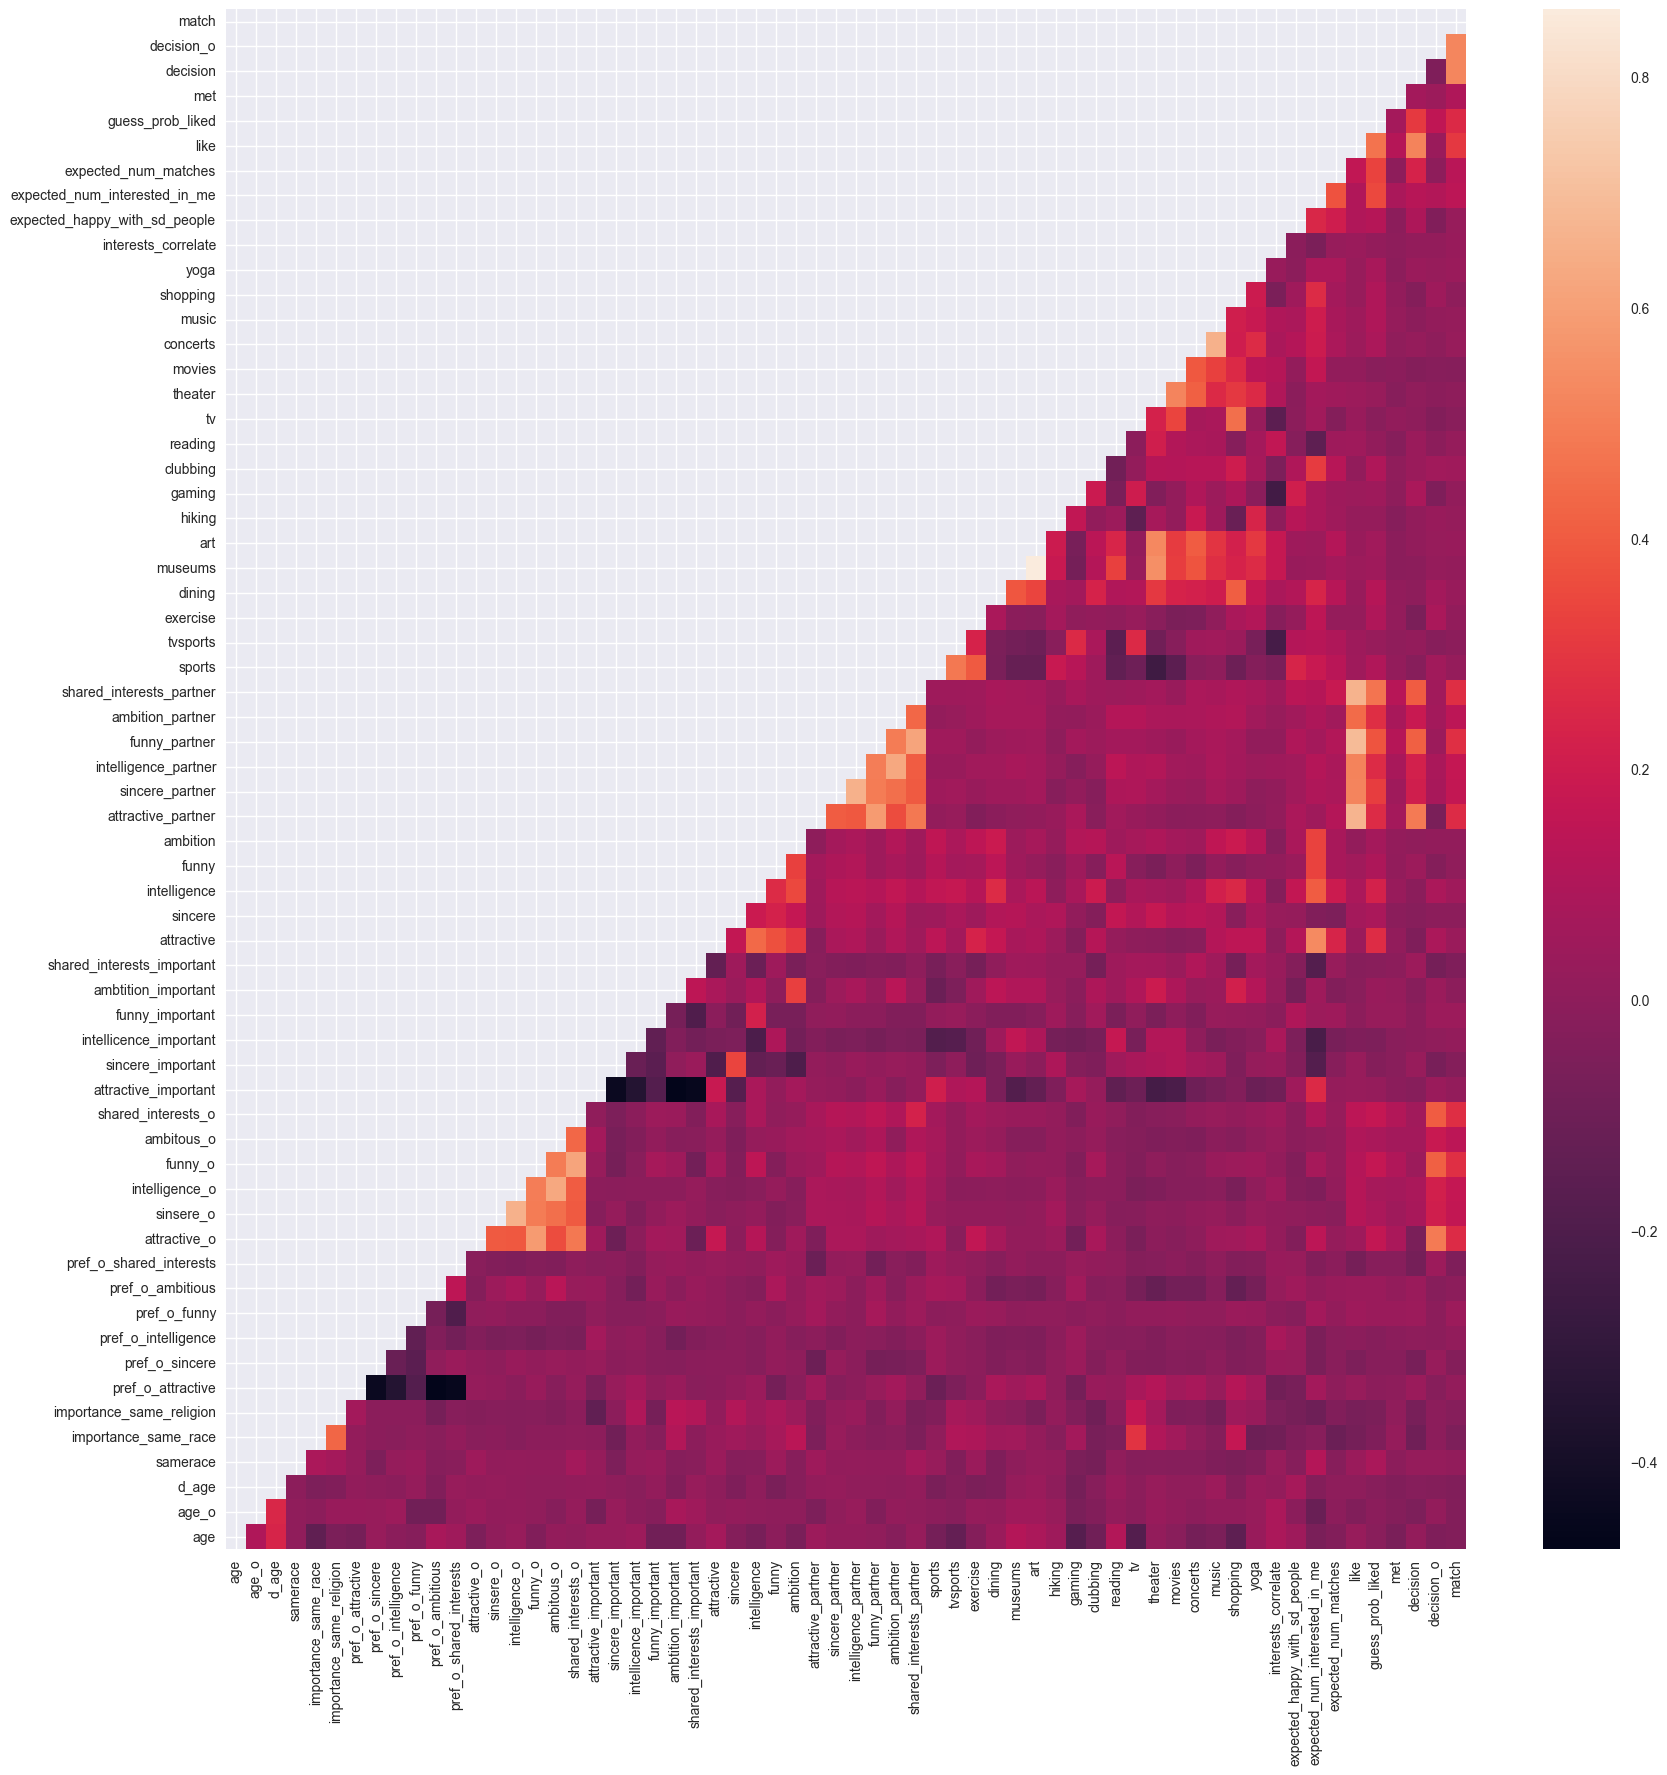

In [11]:
# Plotting the correlation matrix (without the first two columns: "has_null" and "wave")
mask = np.tril(df_og.iloc[:,2:].corr()) # zeroes above axis (for zeros below: np.triu)
#mask = np.triu(np.ones_like(df_og.iloc[:,2:].corr(), dtype=bool))
corr_m_fig, corr_m_ax = plt.subplots(figsize=(20,20))
corr_m_fig = sns.heatmap(df_og.iloc[:,2:].corr(), mask=mask)
corr_m_ax.invert_yaxis()
plt.show()


The correlation matrix shows a relationship between important interests of one person and their final decision. Additionally, one can observe that certain interests/hobbys correlate with each other providing an insight into certain "types of personalities".

In the correlation matrix we can observe a variety of relationships in our data. We can visualize some of these examples. Additionally, we incorporate some of the most relevant statisics into our plots.

In [12]:
from scipy import stats

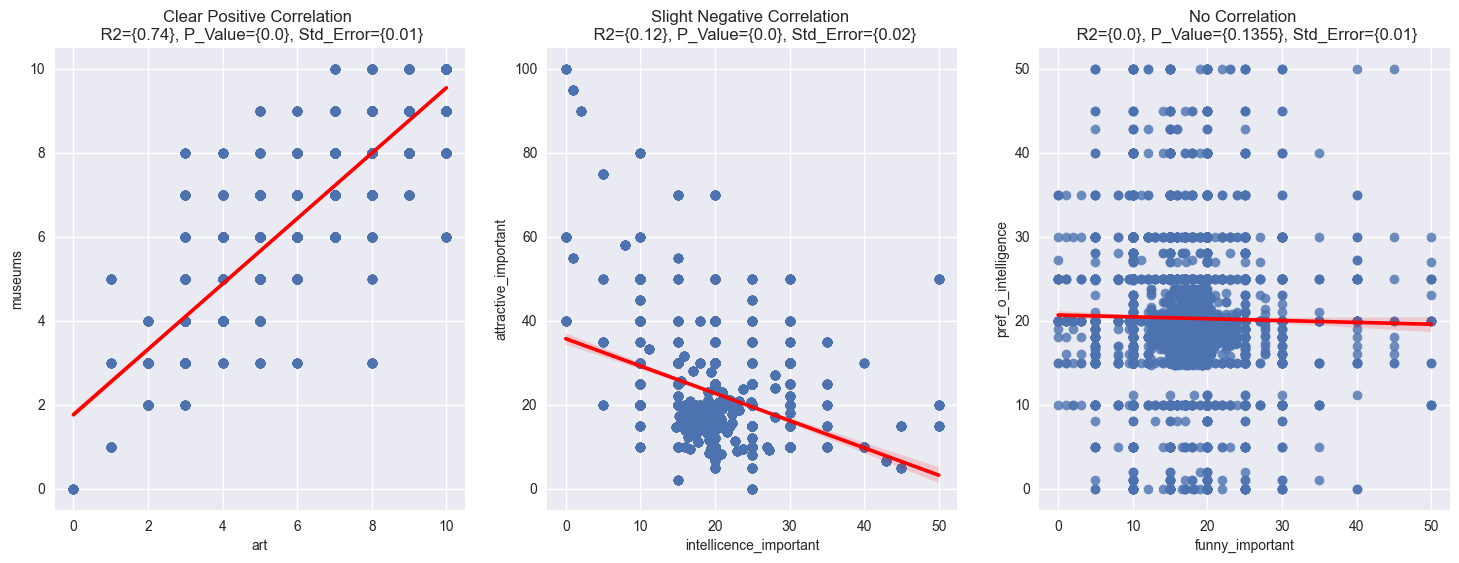

In [13]:
# Visualizing correlations (3 examples)
line_color = {"color": "red"}
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Plot I
sns.regplot(ax=axes[0], x="art", y="museums",
            data=df_og, fit_reg=True, line_kws=line_color)
## Calculating statistics I
slope, intercept, r, p, std_err = stats.linregress(
                                    df_og["art"].dropna(),
                                    df_og["museums"].dropna())
R2, P_Value, Std_Error = {np.round(r**2, 2)}, {np.round(p, 4)}, {np.round(std_err, 2)}
axes[0].set_title(f'Clear Positive Correlation \n {R2=}, {P_Value=}, {Std_Error=}')

# Plot II
sns.regplot(ax=axes[1], x="intellicence_important", y="attractive_important",
            data=df_og, fit_reg=True, line_kws=line_color)
## Calculating statistics II
slope, intercept, r, p, std_err = stats.linregress(
                                    df_og["intellicence_important"].dropna(),
                                    df_og["attractive_important"].dropna())
R2, P_Value, Std_Error = {np.round(r**2, 2)}, {np.round(p, 4)}, {np.round(std_err, 2)}
axes[1].set_title(f'Slight Negative Correlation \n {R2=}, {P_Value=}, {Std_Error=}')

# Plot III
sns.regplot(ax=axes[2], x="funny_important", y="pref_o_intelligence",
            data=df_og, fit_reg=True, line_kws=line_color)
## Calculating statistics III
slope, intercept, r, p, std_err = stats.linregress(
                                    df_og["funny_important"].dropna(),
                                    df_og["pref_o_intelligence"].dropna())
R2, P_Value, Std_Error = {np.round(r**2, 2)}, {np.round(p, 4)}, {np.round(std_err, 2)}
axes[2].set_title(f'No Correlation \n {R2=}, {P_Value=}, {Std_Error=}')
plt.show()

The most important aspect for us is to make sure that we can observe a relationship between one person liking the other and their willingness to match with them since this will be tha basis of out machine learning model.

To investigate this, we inspect the ranges of likeness scores and the final decisions resulting from them.

In [14]:
# Creating a dataframe to investigate the relationship between "like" and "decision"
df_n = df_og.loc[df_og["decision"]==0].groupby("like").agg(count_n=("like", "count")).reset_index()
df_y = df_og.loc[df_og["decision"]==1].groupby("like").agg(count_y=("like", "count")).reset_index()
df_ny = df_n.join(df_y["count_y"])
df_ny

,like,count_n,count_y
0,0.0,8,2
1,1.0,108,7
2,2.0,216,13
3,3.0,383,49
4,4.0,596,3
5,5.0,1090,229
6,5.5,1,1
7,6.0,1069,640
8,6.5,6,14
9,7.0,746,1070


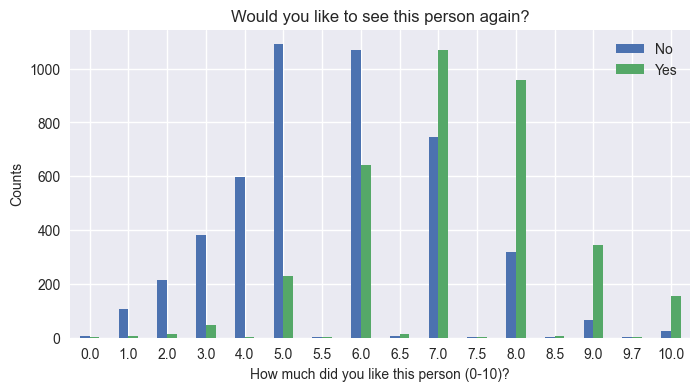

In [15]:
# Visualizing the relationship between "like" and "decision"
df_ny.plot(kind="bar",
           x="like",
           subplots=False,
           rot=0,
           legend=True,
           figsize=(8,4))
plt.xlabel("How much did you like this person (0-10)?")
plt.ylabel("Counts")
plt.legend(["No", "Yes"])
plt.title("Would you like to see this person again?")
plt.show()

We can observe that the majority of answers range between 5-8 on the likeness scale and that there is a trend for negative and positive decisions. We can assume that if a person likes their partner (given their sets of attributes) this person has a preference towards seeing their partner again i.e. having a match. Therefore, a model trained on this data should be able to make predictions about the likelihood of people being a match.

It should be noted that the data displays some anomalies where a person gave their partner the highest score on the likeness scale but didn't want to see them again and vice versa.

#### 3.3 Getting an idea on the value distribution of the data

Having gained an understanding of the range of relationships between different features in the dataset it can also be of interest to look at the values ranges and distributions for different features.

In [84]:
# Inspecting the unique values of different features
f_uni = {}
for col in df_og.columns:
    f_uni[col.upper()] = df_og[col].unique().tolist()
#f_uni

We can observe that different features have very different data types (int, float, str, bool) as well as different ranges for the same data type.

To get a better understanding about the features we can aggregate specific statistics./
We have two options:
- Option 1: Use continuous values as features
- Option 2: Use discrete range categories calculated from these continuous features

##### 3.3.1 Inspecting continuous features (Option 1)

In [17]:
df_og.iloc[:,39:45].agg(["mean", "median", "std", "min", "max"]).T

,mean,median,std,min,max
attractive_important,22.514632,20.00,12.587674,0.0,100.0
sincere_important,17.396389,18.18,7.046700,0.0,60.0
intellicence_important,20.265613,20.00,6.783003,0.0,50.0
funny_important,17.457043,18.00,6.085239,0.0,50.0
ambtition_important,10.682539,10.00,6.124888,0.0,53.0
shared_interests_important,11.845111,10.64,6.362154,0.0,30.0


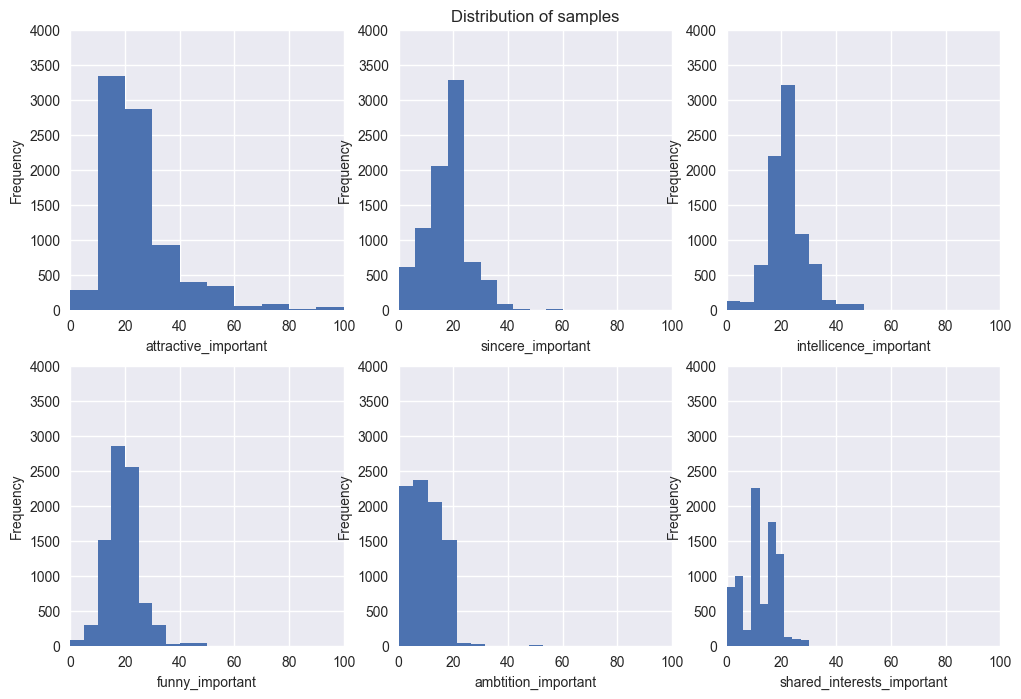

In [18]:
# Visualizing the value distribution of the features
fig = plt.figure(figsize=(12,8))
plt.title("Distribution of samples")
plt.axis("off")
for index, column in enumerate(df_og.iloc[:,39:45]):
    sub_f = fig.add_subplot(2, 3, index+1)
    sub_f.set_xlabel(column)
    sub_f.set_xlim(0,100)
    sub_f.set_ylim(0,4000)
    df_og[column].plot(kind="hist")

While all of these features are measured on a scale from 0-100, we can observe that for 5/6 features the highest score is around the mid point on that scale.\
Taking these features as is would mean that our model wouldn't have seen any examples in the upper ranges and therefore, wouldn't be able to deal with those.

A solution to this problem would be using discrete classes based on these continuous features (partitioning the scale 0-100 into range classes).

##### 3.3.2 Inspecting discrete range categories (Option 2)

From the data documentation we know that several features consist of calculations based on other features in the dataset.\
Thereby, several features resemble the same feature but one is measured on a contunuous scale while the other is discrete.

In [19]:
# Checking ranges for original discrete encodings of continuous features (person 1)
for column in df_og.columns[45:51]: # [21:27] for person 2 (same applies)
    print(df_og[column].unique(), column)

['[0-15]' '[21-100]' '[16-20]'] d_attractive_important
['[16-20]' '[0-15]' '[21-100]'] d_sincere_important
['[16-20]' '[21-100]' '[0-15]'] d_intellicence_important
['[0-15]' '[16-20]' '[21-100]'] d_funny_important
['[0-15]' '[16-20]' '[21-100]'] d_ambtition_important
['[0-15]' '[16-20]' '[21-100]'] d_shared_interests_important


We can observe that the same **fixed** range is applied to all individual features.

Using the same range when converting different features that have very different distributions is likely to result in very imbalanced data that does not allow for adequate decision making. This is the case because a large amound of samples can end up in only one category, leaving the others empty. Ultimately, making this feature useless.

In [20]:
# Checking the distribution of discrete encodings in the original dataset
for column in df_og.columns[45:51]:
    print(df_og[column].value_counts())

[21-100]    3019
[16-20]     2875
[0-15]      2484
Name: d_attractive_important, dtype: int64
[16-20]     3821
[0-15]      3062
[21-100]    1495
Name: d_sincere_important, dtype: int64
[16-20]     4276
[21-100]    2518
[0-15]      1584
Name: d_intellicence_important, dtype: int64
[16-20]     3874
[0-15]      3184
[21-100]    1320
Name: d_funny_important, dtype: int64
[0-15]      6680
[16-20]     1603
[21-100]      95
Name: d_ambtition_important, dtype: int64
[0-15]      6083
[16-20]     1964
[21-100]     331
Name: d_shared_interests_important, dtype: int64


We can indeed see that in the extreme case of "d_ambtition_important" 80% of data falls into just one category while another receves only 1%.

Knowing that as well as the fact that the ranges if the continuous values values between categories, we'll need to calculate and apply individual ranges to convert the continuous values into discrete classes that will then be used to train the model.

## III. DATA PREPARATION (process model)

## 4. Data Cleansing

<span style='color:turquoise'>

In the first step of the Project we have fimilirized ourselves with the dataset and identified steps we need to take to eliviate it's constraints. This chapter will cover the transformation of the original dataset into a new and clean dataset that will be used downstream in the project.

The main goal is to remove all features that are ether noisy, irrelevant, or cannnot be known without having met the other person first.
</span>

#### 4.1 Ranaming misspelled columns

In [21]:
# Renaming columns with misspellings
df = df_og.copy()
df.rename(columns={"intellicence_important": "intelligence_important",
                   "sinsere_o": "sincere_o"},
                   inplace=True)
print(df.shape)

(8378, 123)


#### 4.2 Removing features identifies as being particularly noisy

In [22]:
# Removing noisy columns
df = df.loc[:, ~df.columns.isin([
            "expected_num_interested_in_me"])]#, # very noisy column + no correlation with "match" column (which will be used as labels for the model)
            #"expected_num_matches" # noisy column + no correlation with "match"
            #])]
print(df.shape)

(8378, 122)


#### 4.3 Removing features that provide limited information (e.g. redundancies)

In [23]:
# Removing features that cover assessments of and by partner
unintel_f = ["attractive_o",  "sincere_o", "intelligence_o", "funny_o", "ambitous_o", "shared_interests_o",
"attractive_partner", "sincere_partner", "intelligence_partner", "funny_partner", "ambition_partner", "shared_interests_partner"]
df = df.loc[:, ~df.columns.isin(unintel_f)]
print(df.shape)

(8378, 110)


In [24]:
# Removing features that cover calculated differences between attributes of pairs
df = df.loc[:, ~df.columns.isin(
    df.filter(regex="^d_.") # regular expression to match only "d_" istances at the beginning of column names
    )]
print(df.shape)
df.head(2)

(8378, 54)


,has_null,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_important,sincere_important,intelligence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,'asian/pacific islander/asian-american',european/caucasian-american,0,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,1,0,0
1,0,1,female,21.0,22.0,'asian/pacific islander/asian-american',european/caucasian-american,0,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,1,0,0


In [25]:
# Removing features that are irrelevent (e.g. contain meta information)
irrel_f = ["has_null",
             "wave",
             "samerace",
             "interests_correlate",
             "expected_happy_with_sd_people",
             "expected_num_matches",
             "met",
             "guess_prob_liked",
             "like",
             #"decision_o",
             "match"]
df = df.loc[:, ~df.columns.isin(irrel_f)]
print(df.shape)
df.head(2)

(8378, 44)


,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_important,sincere_important,intelligence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,decision,decision_o
0,female,21.0,27.0,'asian/pacific islander/asian-american',european/caucasian-american,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1,0
1,female,21.0,22.0,'asian/pacific islander/asian-american',european/caucasian-american,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,1,0


In [26]:
# Removing all attributes that exist only for one person
attr = ["attractive", "sincere", "intelligence", "funny",
        "ambition", "sports", "tvsports", "exercise",
        "dining", "museums", "art", "hiking",
        "gaming", "clubbing", "reading", "tv",
        "theater", "movies", "concerts", "music",
        "shopping", "yoga",
        "gender", "field",
        "importance_same_race", "importance_same_religion"]
df = df.loc[:, ~df.columns.isin(attr)]
print(df.shape)
df.head(2)

(8378, 18)


,age,age_o,race,race_o,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_important,sincere_important,intelligence_important,funny_important,ambtition_important,shared_interests_important,decision,decision_o
0,21.0,27.0,'asian/pacific islander/asian-american',european/caucasian-american,35.0,20.0,20.0,20.0,0.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,1,0
1,21.0,22.0,'asian/pacific islander/asian-american',european/caucasian-american,60.0,0.0,0.0,40.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,1,0


In [27]:
# Inspecting the state of tha transofmation
print(f'New dimensions: {df.shape}')
print(f'Samples without NaNs: {len(df[~df.isna().any(axis=1)])}')
print(f'Samples with NaNs: {len(df[df.isna().any(axis=1)])}')

New dimensions: (8378, 18)
Samples without NaNs: 8086
Samples with NaNs: 292


After removing irrelevant features we are left with only 292 noisy samples which amounts to ~4%. This is much different than the 90% of noisy data we were faced with at the start of the project.

To get a final clean dataset, we remove the remaining ~4% of noisy samples.

#### 4.4 Removing remaining noisy samples

In [28]:
# Removing remaining samples with NaN values
df = df.dropna().reset_index(drop=True)
df.head(2)

,age,age_o,race,race_o,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_important,sincere_important,intelligence_important,funny_important,ambtition_important,shared_interests_important,decision,decision_o
0,21.0,27.0,'asian/pacific islander/asian-american',european/caucasian-american,35.0,20.0,20.0,20.0,0.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,1,0
1,21.0,22.0,'asian/pacific islander/asian-american',european/caucasian-american,60.0,0.0,0.0,40.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,1,0


In [29]:
print(f'New dimensions: {df.shape} vs. Original dimensions: {df_og.shape}')
print(f'Without NaNs: {len(df[~df.isna().any(axis=1)])}')
print(f'With NaNs: {len(df[df.isna().any(axis=1)])}')

New dimensions: (8086, 18) vs. Original dimensions: (8378, 123)
Without NaNs: 8086
With NaNs: 0


In [30]:
# Checking if any combination occurs twice
df.duplicated().any()

False

The new dataset doesn't contain any pairings that repeat themselves.

## 5. Feature Engineering

<span style='color:turquoise'>

We define the task as **Binary Classificaiton** by utilizing the "decision" variable. If the decision is 1 (yes), our tagret person will want to match with the suggested person. We consider this to be a good suggestion.
</span>

#### 5.1 Re-structuring the dataset

While the original dataset focused more one main participant (more information) and one auxiliary (less information), we got rid of all the excess features to ensure that the same information is available for both participants. For each pair, this information includes both of their individual sets of preferences as well as their final desicions (whether they would like to see their partner again or not).

**MAIN IDEA: Reshape the data from each sample to be used as two different samples!**
- Use features from person 1 and person 2 from sample n with the label of person 1 
- Use features from person 2 and person 1 from sample n with the label of person 2

Doing this will also duplicate the amount of samples.

In [31]:
# Checking if the same person is present twices in the dataset
order = ["decision",
         "race", "age",
         "attractive_important", "sincere_important",
         "intelligence_important", "funny_important",
         "ambtition_important", "shared_interests_important",
         "decision_o",
         "race_o", "age_o",
         "pref_o_attractive", "pref_o_sincere",
         "pref_o_intelligence", "pref_o_funny",
         "pref_o_ambitious", "pref_o_shared_interests"]
df = df[order]
df.head(2)

,decision,race,age,attractive_important,sincere_important,intelligence_important,funny_important,ambtition_important,shared_interests_important,decision_o,race_o,age_o,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests
0,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,0,european/caucasian-american,27.0,35.0,20.0,20.0,20.0,0.0,5.0
1,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,0,european/caucasian-american,22.0,60.0,0.0,0.0,40.0,0.0,0.0


In [32]:
# Splitting the dataframe into two equal dataframes (one for each person)
p1 = df.iloc[:,:9]
p2 = df.iloc[:,9:]
p2.columns = p1.columns
print(f'{p1.shape=}, {p2.shape=}')

p1.shape=(8086, 9), p2.shape=(8086, 9)


In [33]:
# Combining person 1 and person 2 and keeping the final decision of person 1
p12 = p1.join(p2, lsuffix="_p1", rsuffix="_p2") # person 1 receives the suffix p1
p12 = p12.drop(columns=["decision_p2"])
p12.head(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,27.0,35.0,20.0,20.0,20.0,0.0,5.0
1,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,22.0,60.0,0.0,0.0,40.0,0.0,0.0


In [34]:
# Combining person 2 and person 1 and keeping the final decision of person 2 (now p1)
p21 = p2.join(p1, lsuffix="_p1", rsuffix="_p2") # person 2 receives the suffix p1
p21 = p21.drop(columns=["decision_p2"])
p21.head(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,0,european/caucasian-american,27.0,35.0,20.0,20.0,20.0,0.0,5.0,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0
1,0,european/caucasian-american,22.0,60.0,0.0,0.0,40.0,0.0,0.0,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0


Now we combine these two dataframes and get a dataset with double the amount of samples.

Note: The combination is possible since for both dataframes the main person (person 1 or person 2, whoever occupies the first columns of the datframe) received the suffix p1 and their partner received the suffix p2.

In [35]:
# Concatenating both dataframes
df = pd.concat([p12, p21], axis=0).reset_index(drop=True)
print(df.shape)
#df.head(2)

(16172, 17)


#### 5.2 Inspecting the newly re-structured dataset

/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/3987885991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr()) # zeroes above axis (for zeros below: np.triu)
/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/3987885991.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m_fig = sns.heatmap(df.corr(), mask=mask)


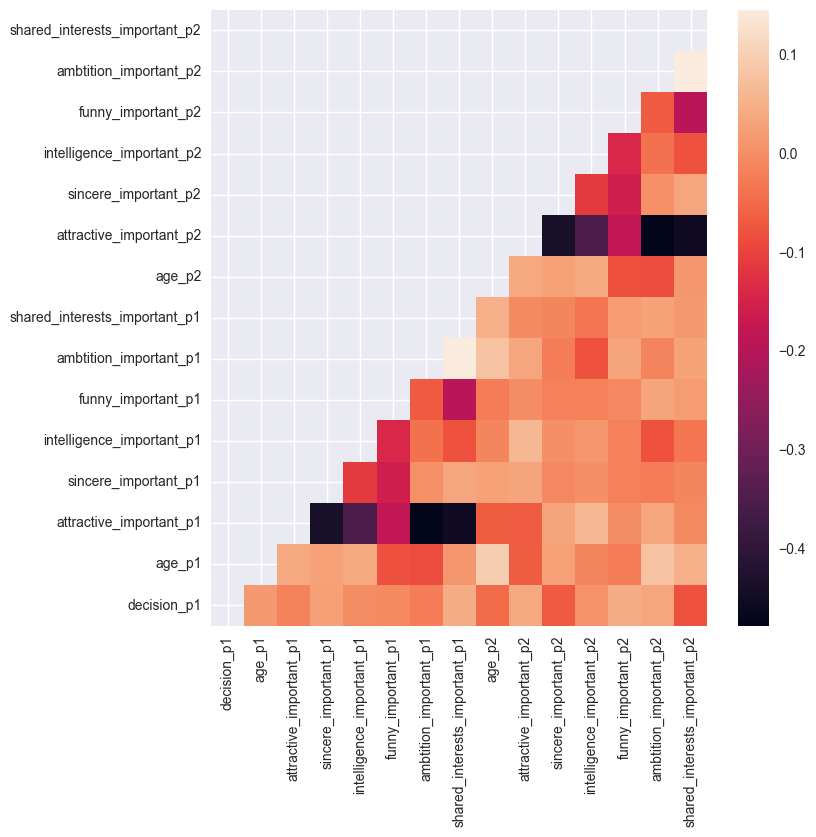

In [36]:
# Plotting the correlation matrix for the clean dataset
mask = np.tril(df.corr()) # zeroes above axis (for zeros below: np.triu)
#mask = np.triu(np.ones_like(df_og.iloc[:,2:].corr(), dtype=bool))
corr_m_fig, corr_m_ax = plt.subplots(figsize=(8,8))
corr_m_fig = sns.heatmap(df.corr(), mask=mask)
corr_m_ax.invert_yaxis()
plt.show()

We can observe only relatively low correlations (meaning the individual features are informative).

In [37]:
# # Aggregating statistics for the clean dataset
df.iloc[:,:9].agg(["mean", "median", "std", "min", "max"]).T

/var/folders/x8/zrfvb_f1495484lqpwvyfzdr0000gn/T/ipykernel_4667/728147764.py:2: FutureWarning: ['race_p1'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.iloc[:,:9].agg(["mean", "median", "std", "min", "max"]).T


,mean,median,std,min,max
decision_p1,0.422088,0.0,0.493908,0.0,1.0
race_p1,NaN,NaN,NaN,'asian/pacific islander/asian-american',other
age_p1,26.375464,26.0,3.557006,18.0,55.0
attractive_important_p1,22.307355,20.0,12.40859,0.0,100.0
sincere_important_p1,17.429805,18.37,7.019203,0.0,60.0
intelligence_important_p1,20.268798,20.0,6.780952,0.0,50.0
funny_important_p1,17.435914,18.0,6.074821,0.0,50.0
ambtition_important_p1,10.732765,10.0,6.099837,0.0,53.0
shared_interests_important_p1,11.869284,10.755,6.355424,0.0,30.0


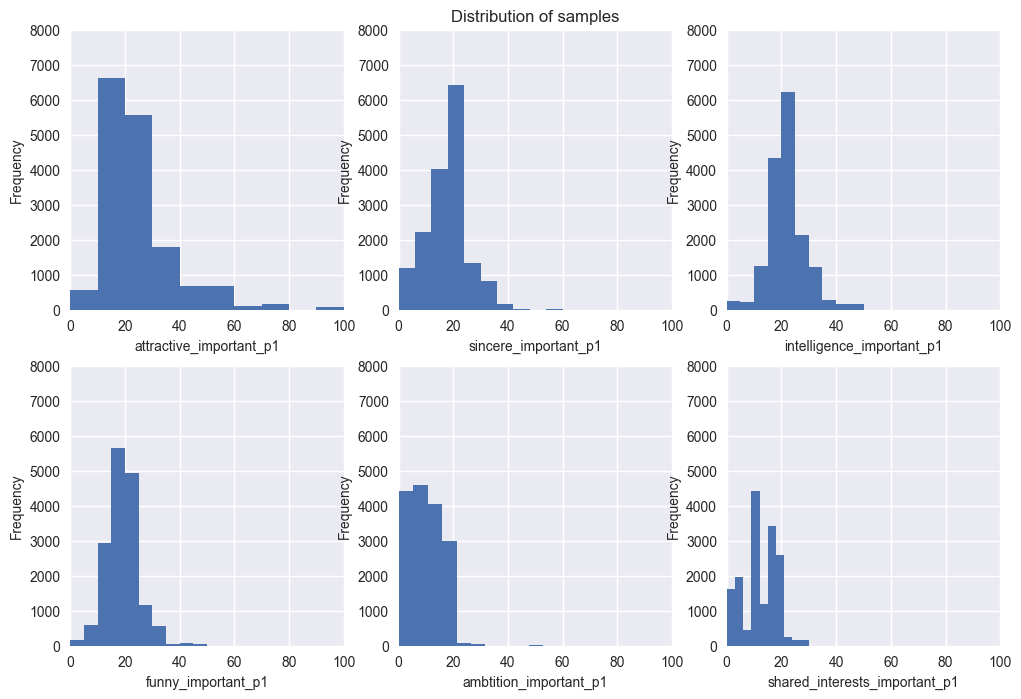

In [38]:
# Visualizing the value distribution of the features in the clean dataset
fig = plt.figure(figsize=(12,8))
plt.title("Distribution of samples")
plt.axis("off")
for index, column in enumerate(df.iloc[:,3:9]):
    sub_f = fig.add_subplot(2, 3, index+1)
    sub_f.set_xlabel(column)
    sub_f.set_xlim(0,100)
    sub_f.set_ylim(0,8000)
    df[column].plot(kind="hist")

Since we didn't remove a large amount of samples during the data cleansing step, the clean dataset still resembles the same ranges for the selected features as observed in the original dataset in **1.3**.

In [39]:
print(df.shape)
df.head()

(16172, 17)


,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,27.0,35.0,20.0,20.0,20.0,0.0,5.0
1,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,22.0,60.0,0.0,0.0,40.0,0.0,0.0
2,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,'asian/pacific islander/asian-american',22.0,19.0,18.0,19.0,18.0,14.0,12.0
3,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,23.0,30.0,5.0,15.0,40.0,5.0,5.0
4,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,'latino/hispanic american',24.0,30.0,10.0,20.0,10.0,10.0,20.0


Our clean (No empty cells or NaNs) dataset consisct of:
- **16172 samples**
- **17 features for each sample**
    - **The label**
        - decision_p1
    - **Features form person 1**
        - race_p1 
        - age_p1
        - attractive_important_p1
        - sincere_important_p1
        - intelligence_important_p1
        - funny_important_p1
        - ambtition_important_p1
        - shared_interests_important_p1
    - **Features from person 2**
        - race_p2 
        - age_p2
        - attractive_important_p2
        - sincere_important_p2
        - intelligence_important_p2
        - funny_important_p2
        - ambtition_important_p2
        - shared_interests_important_p2

Besides our label "decision_p1" (binary) and features "race_p1"/"race_p2" (categorical) all other features are continuous on a scale of 0-100. When looking at the feature "age" that does not move on a explicit scale, we can still assume that some scale exists (human lifespan).

As observed multiple times, the original dataset used a uniform scale for converting value ranges of features into classes. This resulted in a very imbalanced data distribution for some features. Therefore, we create our own discrete encodings of the continuous features based on the data distribution in the individual features.

In [40]:
# Alternatively create an array with index[i] for index[i].values times +
# index[i+1] for index[i+1].values times
length_of_df = len(df)
encoding_d = {}
for column in df.columns[3:9]:
    col_c = df[column].value_counts().sort_index()
    full_list = []
    for index, value in zip(col_c.index, col_c.values):
        sub_l = np.full(value, index)
        full_list.append(sub_l)
    full_list = np.concatenate(full_list)
    full_listlength_of_df = len(df)
    low = f'0-{int(full_list[length_of_df // 3])}'
    mid= f'{int(full_list[length_of_df // 3])+1}-{int(full_list[length_of_df // 3 * 2])}'
    high = f'{int(full_list[length_of_df // 3 * 2])+1}-100'
    encoding_d[column] = [low, mid, high]

In [41]:
encoding_d

{'attractive_important_p1': ['0-16', '17-23', '24-100'],
 'sincere_important_p1': ['0-15', '16-20', '21-100'],
 'intelligence_important_p1': ['0-19', '20-20', '21-100'],
 'funny_important_p1': ['0-15', '16-20', '21-100'],
 'ambtition_important_p1': ['0-10', '11-15', '16-100'],
 'shared_interests_important_p1': ['0-10', '11-15', '16-100']}

In [42]:
# Creating a copy of the clean dataset
df_c = df.copy()

# Defining a funtion to apply to the dataset
def toDiscrete(row_value, category, low, high):
    if not isinstance(row_value, str): # check if category has been assigned already
        # Rounding to 0 decimals ensures that all values fall within predefined categories
        ## e.g. 20.6 becomes 21 and falls into 21-30
        if np.round(row_value,0) >= low and np.round(row_value, 0) <= high: # category assignment condition
            return category # assign discrete category
        else:
            return row_value # do nothing
    else:
        return row_value # do nothing

# Transfroming continuous features into discrete categories of ranges for p1
for key, column in zip(encoding_d, df_c.columns[3:9]):
    for category in encoding_d[key]:
        low = float(category.split("-")[0])
        high = float(category.split("-")[1])
        df_c[column] = df_c[column].apply(toDiscrete, args=(category, low, high))

# Transfroming continuous features into discrete categories of ranges for p2
for key, column in zip(encoding_d, df_c.columns[11:]):
    for category in encoding_d[key]:
        low = float(category.split("-")[0])
        high = float(category.split("-")[1])
        df_c[column] = df_c[column].apply(toDiscrete, args=(category, low, high))

In [43]:
# Continuous
df.head(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,27.0,35.0,20.0,20.0,20.0,0.0,5.0
1,1,'asian/pacific islander/asian-american',21.0,15.0,20.0,20.0,15.0,15.0,15.0,european/caucasian-american,22.0,60.0,0.0,0.0,40.0,0.0,0.0


In [44]:
# Discrete
df_c.head(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,1,'asian/pacific islander/asian-american',21.0,0-16,16-20,20-20,0-15,11-15,11-15,european/caucasian-american,27.0,24-100,16-20,20-20,16-20,0-10,0-10
1,1,'asian/pacific islander/asian-american',21.0,0-16,16-20,20-20,0-15,11-15,11-15,european/caucasian-american,22.0,24-100,0-15,0-19,21-100,0-10,0-10


In [45]:
# Checking the value distribution with custom classes for each feature
for column in df_c.columns[3:9]:
    print(df_c[column].value_counts())

0-16      5758
24-100    5320
17-23     5094
Name: attractive_important_p1, dtype: int64
16-20     7514
0-15      5792
21-100    2866
Name: sincere_important_p1, dtype: int64
0-19      5856
20-20     5488
21-100    4828
Name: intelligence_important_p1, dtype: int64
16-20     7608
0-15      6060
21-100    2504
Name: funny_important_p1, dtype: int64
0-10      8956
11-15     3984
16-100    3232
Name: ambtition_important_p1, dtype: int64
0-10      8008
16-100    4254
11-15     3910
Name: shared_interests_important_p1, dtype: int64


We can see that the newly individually calculated discrete categories resemble a significantly more balanced distribution of data for each individual feature range.\
While the distribution of samples between original uniform categories resulted in extreme ratios of **~70:1** for some features, the new dataset deals with maximal imbalances of **~3:1**.

The last feature we need to deal with is "age_p1"/"age_p2".\
Knowing the lowest age of 18 and the highest age of 55 of participants in the dataset, we need to assume a scale and group ages into classes.

Since we have a wide range of ages, one possible approach to grouping them tegether could be by using the concept of generations.

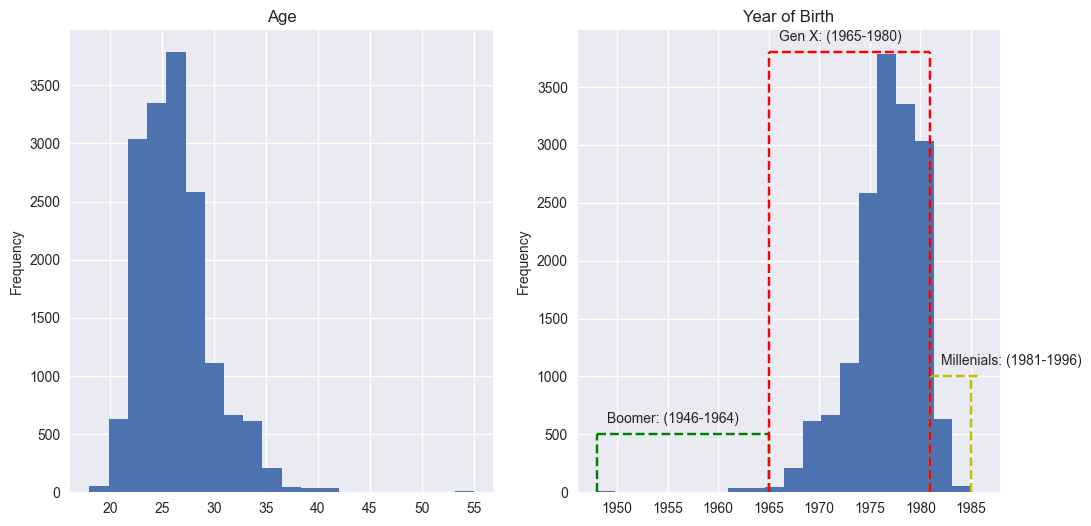

In [46]:
# Defining generations
boomer = (1946, 1964)
gen_x = (1965, 1980)
mill = (1981, 1996)
# Initiating the plot
fig, axes = plt.subplots(1, 2, figsize=(12,6))
# Plot I
df["age_p1"].plot(kind="hist", ax=axes[0], bins=20)
axes[0].set_title("Age")
# Plot II
(2003-df["age_p1"]).plot(kind="hist", ax=axes[1], bins=20)
axes[1].set_title("Year of Birth")
# Boomer annotation
axes[1].vlines(x = np.min(2003-df["age_p1"]), ymin=0, ymax=500, linestyles="--", color = "g")
axes[1].hlines(y = 500, xmin=np.min(2003-df["age_p1"]), xmax=boomer[1]+1, linestyles="--",color = "g")
axes[1].vlines(x = boomer[1]+1, ymin=0, ymax=500, linestyles="--", color = "g")
axes[1].annotate("Boomer: (1946-1964)", xy=(np.min(2003-df["age_p1"]),500), xytext=(np.min(2003-df["age_p1"])+1, 600))
# Millenials annotation
axes[1].vlines(x = mill[0], ymin=0, ymax=1000, linestyles="--", color = "y")
axes[1].hlines(y = 1000, xmin=mill[0], xmax=np.max(2003-df["age_p1"]+1), linestyles="--",color = "y")
axes[1].vlines(x = np.max(2003-df["age_p1"]), ymin=0, ymax=1000, linestyles="--", color = "y")
axes[1].annotate("Millenials: (1981-1996)", xy=(mill[0],1000), xytext=(mill[0]+1, 1100))
# Gen_X annotation
axes[1].vlines(x = gen_x[0], ymin=0, ymax=3800, linestyles="--", color = "r")
axes[1].hlines(y = 3800, xmin=gen_x[0], xmax=gen_x[1]+1, linestyles="--",color = "r")
axes[1].vlines(x = gen_x[1]+1, ymin=0, ymax=3800, linestyles="--", color = "r")
axes[1].annotate("Gen X: (1965-1980)", xy=(gen_x[0],3800), xytext=(gen_x[0]+1, 3900))
plt.show()

When visualizing the generations, we can see that the vast majority belong to the same generation, Gen X. Knowing this, we'll need to try a different approach.

Contrary to other features, we assume that there is a reason for using specific age boundaries for separation of classes. Therefore, we decide to create custom classes manually:
- 0-22: Millenials
- 23-26: Gen X (young)
- 27-30: Gen X (mid)
- 31-100: Gen X (old) + Boomer

This separation provides us with somewhat balanced classes while retaining some connection to the concept of "generations" and not resembling an arbitrary split.


In [47]:
a = df_c.loc[(df_c["age_p1"]>=0) & (df_c["age_p1"]<=22)].index # millenials
b = df_c.loc[(df_c["age_p1"]>=23) & (df_c["age_p1"]<=26)].index # younger gen x 1
c = df_c.loc[(df_c["age_p1"]>=27) & (df_c["age_p1"]<=30)].index # younger gen x 2
d = df_c.loc[(df_c["age_p1"]>=31) & (df_c["age_p1"]<=100)].index # older gen x + boomers
print(len(a), len(b), len(c), len(d))

1958 6798 5796 1620


In [48]:
encoding_d = {'age_p1': ["0-22", "23-26","27-30","31-100"]}
encoding_d

{'age_p1': ['0-22', '23-26', '27-30', '31-100']}

In [49]:
# Transfroming the age feature into a discrete categoriy of age ranges for p1
for category in encoding_d["age_p1"]:
    low = float(category.split("-")[0])
    high = float(category.split("-")[1])
    df_c["age_p1"] = df_c["age_p1"].apply(toDiscrete, args=(category, low, high))

# Transfroming the age feature into a discrete categoriy of age ranges for p2
for category in encoding_d["age_p1"]:
    low = float(category.split("-")[0])
    high = float(category.split("-")[1])
    df_c["age_p2"] = df_c["age_p2"].apply(toDiscrete, args=(category, low, high))

In [50]:
# Continuous
df.tail(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
16170,1,'asian/pacific islander/asian-american',22.0,10.0,25.0,25.0,10.0,10.0,20.0,european/caucasian-american,25.0,70.0,0.0,15.0,15.0,0.0,0.0
16171,1,'asian/pacific islander/asian-american',22.0,20.0,20.0,10.0,15.0,5.0,30.0,european/caucasian-american,25.0,70.0,0.0,15.0,15.0,0.0,0.0


In [51]:
# Discrete
df_c.tail(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
16170,1,'asian/pacific islander/asian-american',0-22,0-16,21-100,21-100,0-15,0-10,16-100,european/caucasian-american,23-26,24-100,0-15,0-19,0-15,0-10,0-10
16171,1,'asian/pacific islander/asian-american',0-22,17-23,16-20,0-19,0-15,0-10,16-100,european/caucasian-american,23-26,24-100,0-15,0-19,0-15,0-10,0-10


In [52]:
# Checking the value distribution for the discrete age classes
for column in df_c[["age_p1", "age_p2"]]:
    print(df_c[column].value_counts())

23-26     6798
27-30     5796
0-22      1958
31-100    1620
Name: age_p1, dtype: int64
23-26     6798
27-30     5796
0-22      1958
31-100    1620
Name: age_p2, dtype: int64


We can see that we were able to cerate discrete classes that are more reasonably balanced than just taking the generational boundaries.

#### 5.3 Scaling / Normalizing / Centering the data

Since our dataset now fully consists only of discrete categories/categorie ranges, we don't need to perform any kind of normalization.

In [53]:
df_c.head(2)

,decision_p1,race_p1,age_p1,attractive_important_p1,sincere_important_p1,intelligence_important_p1,funny_important_p1,ambtition_important_p1,shared_interests_important_p1,race_p2,age_p2,attractive_important_p2,sincere_important_p2,intelligence_important_p2,funny_important_p2,ambtition_important_p2,shared_interests_important_p2
0,1,'asian/pacific islander/asian-american',0-22,0-16,16-20,20-20,0-15,11-15,11-15,european/caucasian-american,27-30,24-100,16-20,20-20,16-20,0-10,0-10
1,1,'asian/pacific islander/asian-american',0-22,0-16,16-20,20-20,0-15,11-15,11-15,european/caucasian-american,0-22,24-100,0-15,0-19,21-100,0-10,0-10


# IV. Modelling & V. Evaluation (Process Model)

## 6. Model Definition / Training / Evaluation

<span style='color:turquoise'>

##### - Model

Since we difined our task as a **Supervised Machine Learning Problem** where we are training a **Binary Classifier** on 1-hot encoded categorical label, we choose:

- **Random Forest Classifier** for our "classical" machine learning algirithm
- **FFNN** for our deep learning machine learning algorithm

##### - Performance Metric

In this classification context, a good first metric for model performance indication will be:
- **Accuracy**

Additionally, we well be dealing with the distribution of predicted classifications in regard to _"True Negative", "False Positive","False Negative","True Positive"_.

Therefore, we'll additionally use:
- **F1-Score** (harmonic mean between precision and recall)

Finally we'll visualize the results in form of:

- **Confusion Matrix**

##### - Additional Iteration in the Process Model 
**NOTE:** Given the nature of the dataset, it was **required that feature creation is implemented in the first iteration**. Otherwise no algorithm could have been trained due to imbalances in value distribution for almost all of the features.\
Therefore **EXTENSIVE FEATURE ENGINEERING** has been performed (Chapter 5):
- Custom disctribution for all features were calculated
- Features (discrete catagories of ranges calculated from original values) have been created

</span>

#### 6.1 "Classical" Machine Learning Model

The first model we will define, train and evaluate will be the "classical" model.\
We will use:
- RandomForestClassifier to train the model
- Accuracy, F1-Score to track and evaluate model performance
- Confusion Matrix to visualize the evaluation results

In [54]:
# Loading libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [55]:
# Splitting data into training and testing sets
X = df_c.iloc[:,1:]
X = pd.get_dummies(data=X) # implementing 1-hot encoding for the features
y = df_c.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [56]:
# Defining the model
rfc = RandomForestClassifier()

In [57]:
# Training the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# Making predictions
y_pred = rfc.predict(X_test)

In [59]:
# Evaluating prediction results
acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
conf_m = (metrics.confusion_matrix(y_test, y_pred))
print(f'{acc=}')
print(f'{f1=}')
print(f'{conf_m=}')

acc=0.9165378670788253
f1=0.9030868628858578
conf_m=array([[1707,  111],
       [ 159, 1258]])


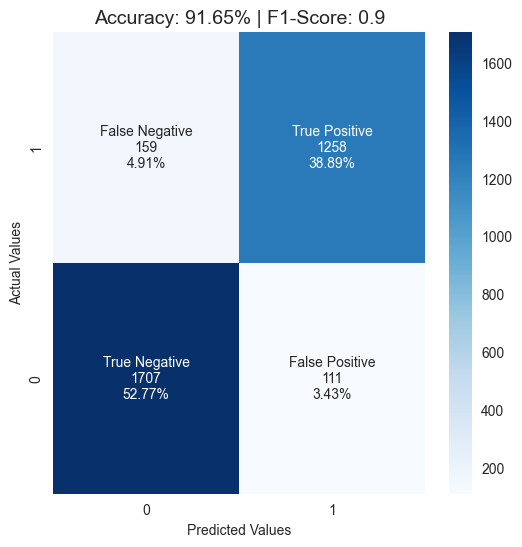

In [65]:
# Visualizing the confusion matrix
## Defining lables for confution matrix visualization
conf_m_n = ["True Negative", "False Positive","False Negative","True Positive"]
conf_m_c = ["{0:0.0f}".format(value) for value in conf_m.flatten()]
conf_m_p = ["{0:.2%}".format(value) for value in conf_m.flatten()/np.sum(conf_m)]
labels = [f"{line_1}\n{line_2}\n{line_3}" for line_1, line_2, line_3 in
          zip(conf_m_n, conf_m_c, conf_m_p)]
labels = np.asarray(labels).reshape(2,2)

# Creating confusion matrix plot
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_m,
            annot=labels,
            fmt="",
            cmap="Blues")
ax.invert_yaxis()
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title(f'Accuracy: {np.round(acc*100,2)}% | F1-Score: {np.round(f1,2)}',
             fontsize=14)
plt.show()

#### 6.2 Deep Learning Model

The second model we will define, train and evaluate will be the deep learning model.\
We will use:
- Fully Connected Neural Network (with 2 hidden layers) to train the model
- Accuracy, F1-Score to track and evaluate model performance
- Confusion Matrix to visualize the evaluation results

In [66]:
# Loading libraries
from sklearn.neural_network import MLPClassifier

In [67]:
# Splitting data into training and testing sets
X = df_c.iloc[:,1:]
X = pd.get_dummies(data=X) # implementing 1-hot encoding for the features
y = df_c.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

#### 6.2.1 Grid Search

In order to find the best hyper-parameters for our hidden layers, we perform a grid-search.

In [68]:
# Setting parameters for grid-search
param_set_1 = [128, 256] # neurons in hidden layer 1
param_set_2 = [32, 64] # neurons in hidden layer 2

In [69]:
# Defining dataframe for results
grid_df = pd.DataFrame(columns=("conf", "acc", "f1"))
# Performing grid-search
for p1 in param_set_1:
    for p2 in param_set_2:
        mlpc = MLPClassifier(hidden_layer_sizes=(p1,p2), # 2 hidden layers
                        activation="relu", # rectified linear units
                        solver="sgd", # stochastic gradient descent
                        learning_rate="adaptive",
                        momentum=0.5,
                        learning_rate_init=0.1, # initial learning rate
                        batch_size=32,
                        max_iter=500,
                        random_state=1)
        # Training the mode
        mlpc.fit(X_train, y_train)
        # Making predictions
        y_pred = mlpc.predict(X_test)
        # Evaluating prediction results
        acc = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        # Adding results to dataframe (for inspection)
        grid_df.loc[-1] = [str([p1,p2]), acc, f1]
        grid_df.index = grid_df.index + 1  # shifting index
        grid_df = grid_df.sort_index()


In [70]:
# Inspecting grid-search results
grid_df.sort_values("acc", ascending=False).head()

,conf,acc,f1
1,"[256, 32]",0.920556,0.909347
0,"[256, 64]",0.916538,0.904728
2,"[128, 64]",0.913447,0.901616
3,"[128, 32]",0.906646,0.892984


#### 6.2.2 DL Model Definition / Training / Evaluation

Having gained insights from the grid-search, we train a model with hyper-parameters that deliver the best results in regard to our selected performance metrics.

In [71]:
# Defining the model
mlpc = MLPClassifier(hidden_layer_sizes=(256,32), # 2 hidden layers
                     activation="relu", # rectified linear units
                     solver="sgd", # stochastic gradient descent
                     learning_rate="adaptive",
                     momentum=0.5,
                     learning_rate_init=0.1, # initial learning rate
                     #alpha=0.0001, # L2 regularization
                     batch_size=32,
                     max_iter=500,
                     random_state=1)

In [72]:
# Training the model
mlpc.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(256, 32),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=500,
              momentum=0.5, random_state=1, solver='sgd')

In [73]:
# Making predictions
y_pred = mlpc.predict(X_test)

In [74]:
# Evaluating prediction results
acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
conf_m = (metrics.confusion_matrix(y_test, y_pred))
print(f'{acc=}')
print(f'{f1=}')
print(f'{conf_m=}')

acc=0.9205564142194745
f1=0.909347442680776
conf_m=array([[1689,  129],
       [ 128, 1289]])


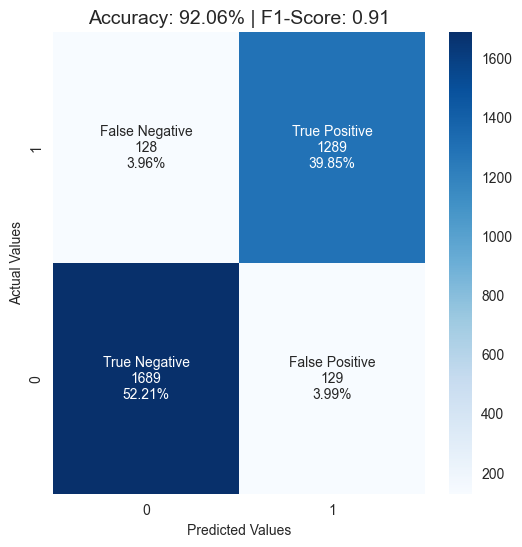

In [75]:
# Visualizing the confusion matrix
## Defining lables for confution matrix visualization
conf_m_n = ["True Negative", "False Positive","False Negative","True Positive"]
conf_m_c = ["{0:0.0f}".format(value) for value in conf_m.flatten()]
conf_m_p = ["{0:.2%}".format(value) for value in conf_m.flatten()/np.sum(conf_m)]
labels = [f"{line_1}\n{line_2}\n{line_3}" for line_1, line_2, line_3 in
          zip(conf_m_n, conf_m_c, conf_m_p)]
labels = np.asarray(labels).reshape(2,2)

# Creating confusion matrix plot
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_m,
            annot=labels,
            fmt="",
            cmap="Blues")
ax.invert_yaxis()
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title(f'Accuracy: {np.round(acc,4)*100}% | F1-Score: {np.round(f1,2)}',
             fontsize=14)
plt.show()

We can see that we were able to slightly increase our model performance when using a simple neural network. This is more present in the fact that the out model is very balanced in regard to the _False Negative_ and _False Positive_ rate, while the previously trained Random Forest Classifier had a slight tendency towards _False Negatives_.

# VI. Deployment (Process Model)

<span style='color:turquoise'>

In the context of a professional environment this would be the step to present the results to stakeholders and assuming all relevant components (e.g. the front-end, users, etc.) are in place the model would be put into place (e.g. as a step within the _Continuous Integration / Continuous Development_ loop).

Given the nature of this project, the model will be deployed only hypothetically.
</span>